Task 1:
Web scraping to gain company insights

Importing Libraires

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Web Scraping

In [26]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 300

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 300 total reviews
Scraping page 2
   ---> 600 total reviews
Scraping page 3
   ---> 900 total reviews
Scraping page 4
   ---> 1200 total reviews
Scraping page 5
   ---> 1500 total reviews
Scraping page 6
   ---> 1800 total reviews
Scraping page 7
   ---> 2100 total reviews
Scraping page 8
   ---> 2400 total reviews
Scraping page 9
   ---> 2700 total reviews
Scraping page 10
   ---> 3000 total reviews


Dataframe Creation

In [27]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [28]:
df

,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."
...,...
2995,Boarding delayed in MIA due to weather but BA ...
2996,Our return flight from Barbados to England was...
2997,Flight was picked because it got us from Riyad...
2998,"I have been a long time supporter of BA, but t..."


In [29]:
df['reviews']=df['reviews'].str.split('|', expand=True)[1]

In [30]:
df

,reviews
0,On a recent flight from Cyprus BA621 on 23/...
1,Flight BA 0560 arrived in Rome on 11 Decemb...
2,This was the first time I flew British Airw...
3,Pretty good flight but still some small thi...
4,"Check in was fine, but no priority/fast track..."
...,...
2995,None
2996,None
2997,None
2998,None


Data Cleaning

In [31]:
import re

def clean(text):
# Removing all the special characters and numerical values
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,On a recent flight from Cyprus BA621 on 23/...,On a recent flight from Cyprus BA on the seco...
1,Flight BA 0560 arrived in Rome on 11 Decemb...,Flight BA arrived in Rome on December where A...
2,This was the first time I flew British Airw...,This was the first time I flew British Airway...
3,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...
4,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...


Natural Language Processing

In [32]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [34]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))

    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,On a recent flight from Cyprus BA621 on 23/...,On a recent flight from Cyprus BA on the seco...,"[(recent, a), (flight, n), (Cyprus, n), (BA, n..."
1,Flight BA 0560 arrived in Rome on 11 Decemb...,Flight BA arrived in Rome on December where A...,"[(Flight, n), (BA, n), (arrived, v), (Rome, n)..."
2,This was the first time I flew British Airw...,This was the first time I flew British Airway...,"[(first, a), (time, n), (flew, v), (British, a..."
3,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...,"[(Pretty, r), (good, a), (flight, n), (still, ..."
4,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...,"[(Check, n), (fine, a), (priority, n), (fast, ..."


In [35]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,On a recent flight from Cyprus BA621 on 23/...,On a recent flight from Cyprus BA on the seco...,"[(recent, a), (flight, n), (Cyprus, n), (BA, n...",recent flight Cyprus BA second cabin door cl...
1,Flight BA 0560 arrived in Rome on 11 Decemb...,Flight BA arrived in Rome on December where A...,"[(Flight, n), (BA, n), (arrived, v), (Rome, n)...",Flight BA arrive Rome December passengers re...
2,This was the first time I flew British Airw...,This was the first time I flew British Airway...,"[(first, a), (time, n), (flew, v), (British, a...",first time fly British Airways huge disappoi...
3,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...,"[(Pretty, r), (good, a), (flight, n), (still, ...",Pretty good flight still small thing improve...
4,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...,"[(Check, n), (fine, a), (priority, n), (fast, ...",Check fine priority fast track line security...


In [36]:
df[['reviews','Lemma']]

,reviews,Lemma
0,On a recent flight from Cyprus BA621 on 23/...,recent flight Cyprus BA second cabin door cl...
1,Flight BA 0560 arrived in Rome on 11 Decemb...,Flight BA arrive Rome December passengers re...
2,This was the first time I flew British Airw...,first time fly British Airways huge disappoi...
3,Pretty good flight but still some small thi...,Pretty good flight still small thing improve...
4,"Check in was fine, but no priority/fast track...",Check fine priority fast track line security...
...,...,...
2995,None,None
2996,None,None
2997,None,None
2998,None,None


In [37]:
pip install vadersentiment

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,On a recent flight from Cyprus BA621 on 23/...,On a recent flight from Cyprus BA on the seco...,"[(recent, a), (flight, n), (Cyprus, n), (BA, n...",recent flight Cyprus BA second cabin door cl...,-0.7184,Negative
1,Flight BA 0560 arrived in Rome on 11 Decemb...,Flight BA arrived in Rome on December where A...,"[(Flight, n), (BA, n), (arrived, v), (Rome, n)...",Flight BA arrive Rome December passengers re...,0.5559,Positive
2,This was the first time I flew British Airw...,This was the first time I flew British Airway...,"[(first, a), (time, n), (flew, v), (British, a...",first time fly British Airways huge disappoi...,-0.2748,Negative
3,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...,"[(Pretty, r), (good, a), (flight, n), (still, ...",Pretty good flight still small thing improve...,0.9937,Positive
4,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...,"[(Check, n), (fine, a), (priority, n), (fast, ...",Check fine priority fast track line security...,0.9668,Positive


In [39]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,1207
Negative,905
Neutral,888


In [40]:
type(vader_counts)

pandas.core.series.Series

Data Visualization

([<matplotlib.patches.Wedge at 0x7a1b7aa0da20>,
 [Text(0.33224090722970473, 1.04862575762909, 'Positive'),
  Text(-1.0391922851311726, -0.3606652111361056, 'Negative'),
  Text(0.8071717141593353, -1.0821154392490113, 'Neutral')],
 [Text(0.18122231303438438, 0.5719776859795036, '40.2%'),
  Text(-0.5668321555260941, -0.19672647880151212, '30.2%'),
  Text(0.5082192274336556, -0.6813319432308589, '29.6%')])

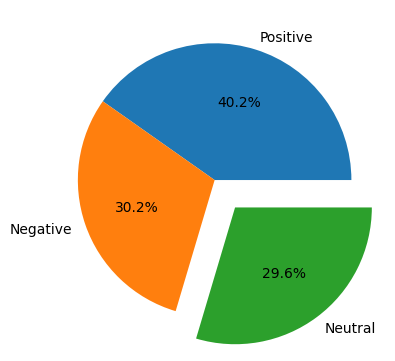

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
#plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

Data Storing

In [42]:
df.to_csv("Preprocessed British Airways reviews.csv")

Data Visualization

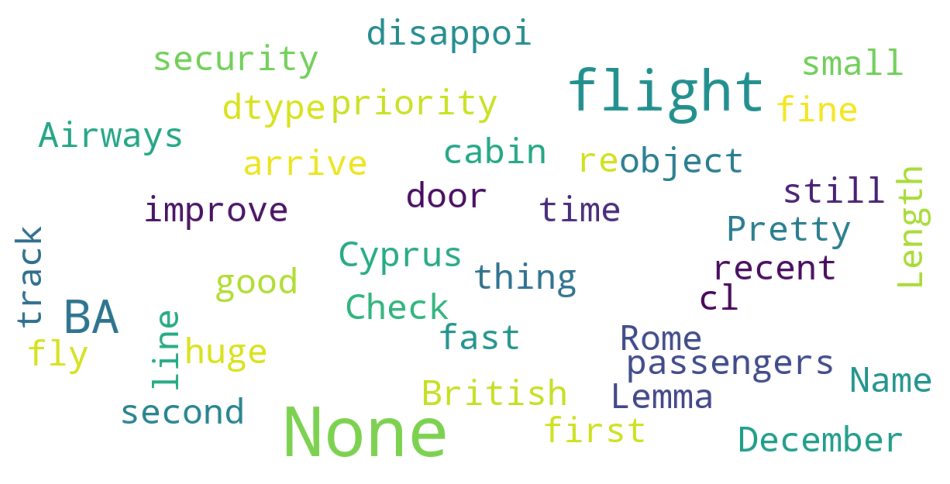

In [43]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

Background Knowledge

Importing Libraries




Importing Requests: To import data from a url.

Importing Beautifulsoup4: Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

Importing Pandas: It is used to create a dataframe from the scrapped data, and used as a framework for cleaning, analyzing, and visualizing of data.



Natural Language Processing




Tokenization: Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Enrichment - POS tagging: Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Stopwords removal: Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

Stem Words: A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.
